# Sequence Length

In [13]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from core.rnn import create_model, load_data, train

LABELS = ["walking", "stairs_down", "stairs_up", "other"]

In [15]:
def try_model(sequence_length, labels, epochs=50):
    model = create_model(sequence_length, labels)

    x_train, y_train = load_data("../data/uci_train_4.csv", sequence_length, labels)
    x_test, y_test = load_data("../data/uci_test_4.csv", sequence_length, labels)
    
    history = train(
        model,
        x_train,
        y_train,
        x_test,
        y_test,
        epochs=epochs,
        batch_size=128,
        verbose=False
    )
    
    return max(history.history["val_acc"])

## Length 8 (160ms)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_6 (GRU)                  (None, 128)               50688     
_________________________________________________________________
dense_11 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 132       
Total params: 54,948
Trainable params: 54,948
Non-trainable params: 0
_________________________________________________________________


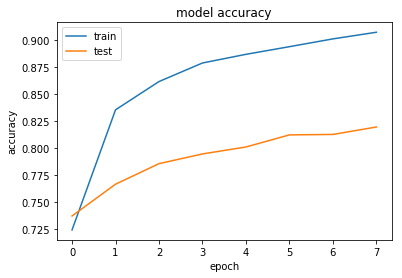

0.8195410587037666


In [16]:
accuracy_8 = try_model(8, LABELS, epochs=8)
print(accuracy_8)

## Length 16 (320ms)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_7 (GRU)                  (None, 128)               50688     
_________________________________________________________________
dense_13 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 132       
Total params: 54,948
Trainable params: 54,948
Non-trainable params: 0
_________________________________________________________________


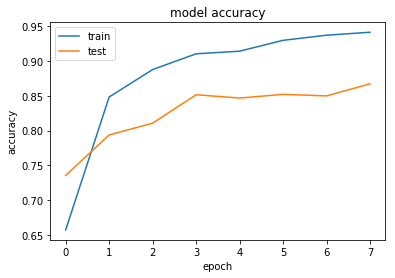

0.8671530369665407


In [17]:
accuracy_16 = try_model(16, LABELS, epochs=8)
print(accuracy_16)

## Length 32 (640ms)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_8 (GRU)                  (None, 128)               50688     
_________________________________________________________________
dense_15 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 132       
Total params: 54,948
Trainable params: 54,948
Non-trainable params: 0
_________________________________________________________________


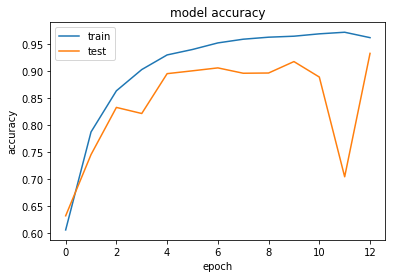

0.9326433661552781


In [18]:
accuracy_32 = try_model(32, LABELS, epochs=13)
print(accuracy_32)

## Length 64 (1280ms)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_9 (GRU)                  (None, 128)               50688     
_________________________________________________________________
dense_17 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 132       
Total params: 54,948
Trainable params: 54,948
Non-trainable params: 0
_________________________________________________________________


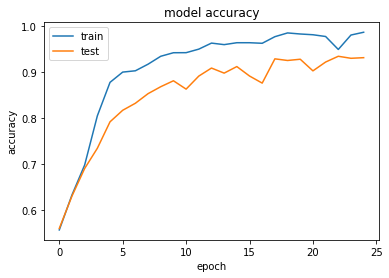

0.9345096708517137


In [19]:
accuracy_64 = try_model(64, LABELS, epochs=25)
print(accuracy_64)

## Length 80 (1600ms)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_10 (GRU)                 (None, 128)               50688     
_________________________________________________________________
dense_19 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 132       
Total params: 54,948
Trainable params: 54,948
Non-trainable params: 0
_________________________________________________________________


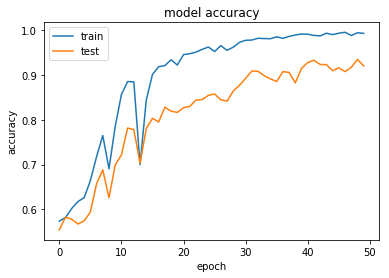

0.9345096708517137


In [20]:
accuracy_80 = try_model(80, LABELS)
print(accuracy_80)

## Length 96 (1920ms)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_11 (GRU)                 (None, 128)               50688     
_________________________________________________________________
dense_21 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 132       
Total params: 54,948
Trainable params: 54,948
Non-trainable params: 0
_________________________________________________________________


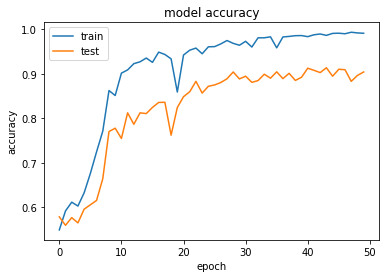

0.9138106549032915


In [21]:
accuracy_96 = try_model(96, LABELS)
print(accuracy_96)

## Length 128 (2560ms)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_12 (GRU)                 (None, 128)               50688     
_________________________________________________________________
dense_23 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_24 (Dense)             (None, 4)                 132       
Total params: 54,948
Trainable params: 54,948
Non-trainable params: 0
_________________________________________________________________


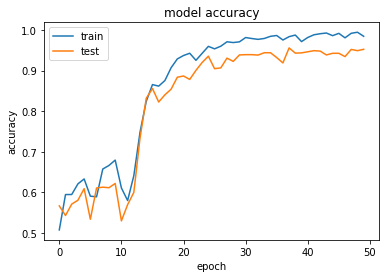

0.9558873430607397


In [22]:
accuracy_128 = try_model(128, LABELS)
print(accuracy_128)

## Conclusions

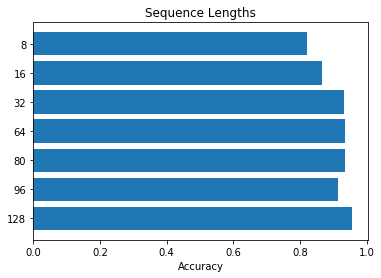

In [23]:
fig, ax = plt.subplots()

lengths = ('8', '16', '32', '64', '80', '96', '128')
y_pos = np.arange(len(lengths))
performance = np.array([accuracy_8, accuracy_16, accuracy_32, accuracy_64, accuracy_80, accuracy_96, accuracy_128])

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(lengths)
ax.invert_yaxis()
ax.set_xlabel('Accuracy')
ax.set_title('Sequence Lengths')

plt.show()